<h1> Guided lab: Regression Models with Keras</h1>

Objective for this Notebook

- How to use the Tensorflow API, Keras, to build a regression model.
- Download and Clean dataset
- Build a Neural Network
- Train and Test the Network   

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Download and Clean Dataset</a>  
2. <a href="#item32">Import Keras</a>  
3. <a href="#item33">Build a Neural Network</a>  
4. <a href="#item34">Train and Test the Network</a>  

</font>
</div>


<a id="item31"></a>


## Download and Clean Dataset


Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [1]:
import pandas as pd
import numpy as np

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


Let's download the data and read it into a <em>pandas</em> dataframe.


In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 


#### Let's check how many data points we have.


In [3]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Let's check the dataset for any missing values.


In [4]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [6]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [7]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [9]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* since we will need this number when building our network.


In [11]:
n_cols = predictors_norm.shape[1] # number of predictors
n_cols

8

<a id="item1"></a>


<a id='item32'></a>


## Import Keras


Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.


#### Let's go ahead and import the Keras library


In [13]:
from tensorflow import keras

As you can see, the TensorFlow backend was used to install the Keras library.


Let's import the rest of the packages from the Keras library that we will need to build our regressoin model.


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Input

<a id='item33'></a>


## Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [23]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

The above function create a model that has two hidden layers, each of 50 hidden units.


<a id="item4"></a>


<a id='item34'></a>


## Train and Test the Network


Let's call the function now to create our model.


In [24]:
# build the model
model = regression_model()

Now we will split our data into training and testing with a 70%-30% split (test_size=0.3).   

70% of our data will be used for training :

X_train : Our training data containing the variables the model will use to learn how to predict.

y_train : Our training data containing the labels.

#
30% of our data will be used for testing its performance metrics :

X_test : Unseen data by the model, we will use it to make predictions with our trained model.

y_test : The labels associated with X_test data, we will compare them with the predictions that our model provided as output when shown X_test and that way we will obtain performance metrics.

In [25]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=42)

Next, we will train the model using the *fit* method. We will train the model for 100 epochs.


In [26]:
# fit the model
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
23/23 - 2s - 73ms/step - loss: 1553.7557
Epoch 2/100
23/23 - 0s - 2ms/step - loss: 1426.7812
Epoch 3/100
23/23 - 0s - 5ms/step - loss: 1244.1888
Epoch 4/100
23/23 - 0s - 3ms/step - loss: 974.5024
Epoch 5/100
23/23 - 0s - 2ms/step - loss: 657.0842
Epoch 6/100
23/23 - 0s - 3ms/step - loss: 396.4605
Epoch 7/100
23/23 - 0s - 2ms/step - loss: 259.5241
Epoch 8/100
23/23 - 0s - 3ms/step - loss: 220.7710
Epoch 9/100
23/23 - 0s - 3ms/step - loss: 202.9456
Epoch 10/100
23/23 - 0s - 2ms/step - loss: 192.8457
Epoch 11/100
23/23 - 0s - 3ms/step - loss: 184.3840
Epoch 12/100
23/23 - 0s - 2ms/step - loss: 177.7185
Epoch 13/100
23/23 - 0s - 4ms/step - loss: 171.8520
Epoch 14/100
23/23 - 0s - 2ms/step - loss: 167.5619
Epoch 15/100
23/23 - 0s - 2ms/step - loss: 163.7880
Epoch 16/100
23/23 - 0s - 2ms/step - loss: 160.7003
Epoch 17/100
23/23 - 0s - 2ms/step - loss: 157.0492
Epoch 18/100
23/23 - 0s - 7ms/step - loss: 154.3699
Epoch 19/100
23/23 - 0s - 6ms/step - loss: 152.0337
Epoch 20/100
23/2

### Now lets evaluate our model and get performance metrics !

First, since our model only saw the training data and learned from it, we will make predictions on the unseen test set.

y_pred are the predictions that our model generated from it's experience when shown the predictor variables of X_test.

That way we can compare y_pred (predictions made by our model) with y_test (the real labels of X_test) and see the difference as performance metrics.

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Since this is a regression model we will be using mean squared error, mean absolute error and the r squared score to evaluate it.

In [28]:
# Calculate and print regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 40.2764
Mean Absolute Error (MAE): 4.9091
R² Score: 0.8511


Feel free to vary the following and note what impact each change has on the model's performance:

1. Increase or decreate number of neurons in hidden layers
2. Add more hidden layers
3. Increase number of epochs


In [37]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model2 = regression_model()
history = model2.fit(X_train, y_train, epochs=150, verbose=1)
y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')



Epoch 1/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1569.6083
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1119.6747 
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 377.1785 
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 243.0083
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 231.4794  
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 211.0452  
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 192.5431  
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173.8455
Epoch 9/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 161.9604 
Epoch 10/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 156.2277 
Epoch 11/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 159.9408 
Epoch 12/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144.3058 
Epoch 13/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 127.5374 
Epoch 14/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134.4571 
Epoch 15/150
23/23 ━━━━━━━━

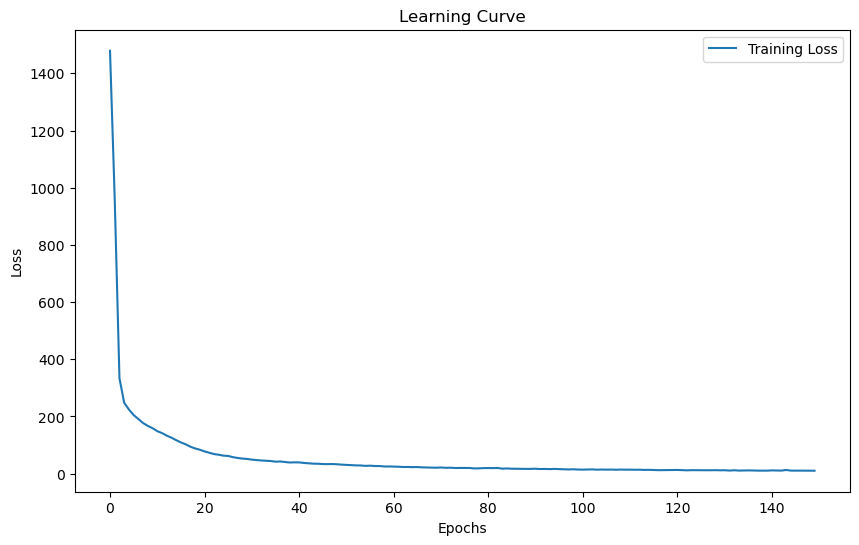

In [39]:
# Plotting the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


For other models, other types of performance metrics are more meaningfull. It all depends on context and the end goal of the model. 

Research, planning and analysing various metrics with a clearly defined end goal is key to understanding how capable a model is and what are his limitations.

Keep that in mind when tackling the next exercises!

### Thank you for following this tutorial!